# Inference and robustness tests

Neural network code for the *Non Destructive Diagnostic Measurement Methods for HF RFID Devices with AI Assistance* paper.

In [1]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from google.colab import files

Uploading the trained model:

In [2]:
uploaded = files.upload()

Saving median_model.h5 to median_model.h5


Uploading the new data:

In [3]:
uploaded = files.upload()

Saving New_data.csv to New_data.csv


In [4]:
# Previously found model:
modelName = "median_model.h5"
model = keras.models.load_model(modelName)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 50)          150       
                                                                 
 dense_1 (Dense)             (None, None, 10)          510       
                                                                 
 dense_2 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 671 (2.62 KB)
Trainable params: 671 (2.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Loading and printing the data:

In [6]:
filename = list(uploaded)[0]
df = pd.read_csv(filename)
df

,real,imag,status
0,124.912,11.992,KO
1,125.229,9.854,KO
2,125.495,9.536,KO
3,125.222,9.444,KO
4,57.596,6.008,KO
5,125.041,9.394,KO
6,124.368,9.067,KO
7,124.136,9.698,KO
8,42.829,-28.426,NB
9,40.536,-34.538,NB


In [7]:
print(df["status"].value_counts())

NB     20
OK     12
ROB    11
KO      8
Name: status, dtype: int64


Projecting the raw data in a Smith chart:

In [8]:
z = 50. # in ohm, reference value.
x, y = df["real"], df["imag"]
R = (x+z)*(x+z)+y*y
df_Smith = df.copy()
df_Smith["real"] = (x*x+y*y-z*z) / R
df_Smith["imag"] = 2.*z*y / R
df_Smith

,real,imag,status
0,0.430959,0.039014,KO
1,0.431117,0.031991,KO
2,0.431861,0.030871,KO
3,0.430948,0.030670,KO
4,0.073486,0.051735,KO
5,0.430346,0.030572,KO
6,0.428047,0.029741,KO
7,0.427512,0.031883,KO
8,0.015104,-0.301594,NB
9,0.035788,-0.367831,NB


Normalizing by previously found boundaries:

In [9]:
dataMin = pd.Series({"real": -33.000, "imag": -232.718}, dtype="float64")
dataMax = pd.Series({"real": 709.874, "imag":  305.250}, dtype="float64")
print("dataMin:\n", dataMin, "\n")
print("dataMax:\n", dataMax)

dataMin:
 real    -33.000
imag   -232.718
dtype: float64 

dataMax:
 real    709.874
imag    305.250
dtype: float64


In [10]:
def normalizeData(df, dataMin, dataMax):
  df_nz = (df - dataMin) / (dataMax - dataMin)
  df_nz["status"] = df["status"]
  df_nz = df_nz[df.columns] # keeping the original column order
  return df_nz

In [11]:
df = normalizeData(df, dataMin, dataMax)

Drawing the data:

In [12]:
# Drawing the data, along with an optional heatmap:
def drawData(data, title, grid=[], heatmap=[]):
  fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
  if len(grid) != 0 and len(heatmap) != 0 and len(grid) == len(heatmap):
    ax.scatter(grid[:,0], grid[:,1], c=heatmap, alpha=0.3)
    title = "Heatmap - " + title
  colorMapping = { "OK": "red", "KO": "royalblue", "NB": "black", "ROB": "grey" }
  for label, df_group in data.groupby("status"):
    ax.scatter(df_group["real"], df_group["imag"], c=df_group["status"].map(colorMapping), label=label)
  ax.legend(loc=(1.01, 0.5), title="status")
  plt.xlabel("real")
  plt.ylabel("imag")
  plt.title(title)
  plt.show()

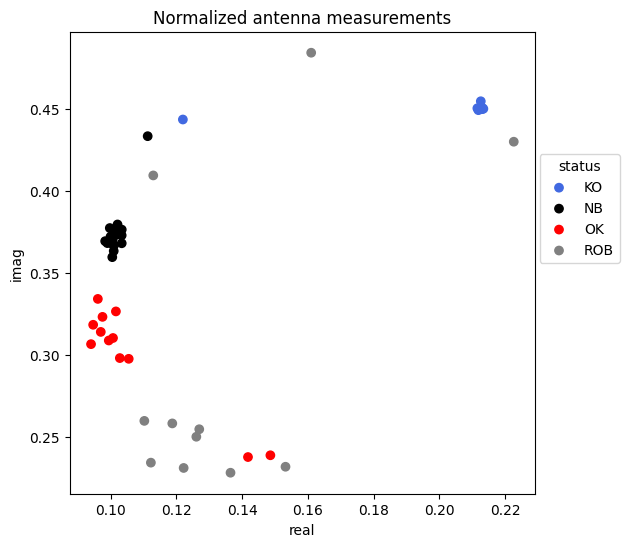

In [13]:
drawData(df, title="Normalized antenna measurements")

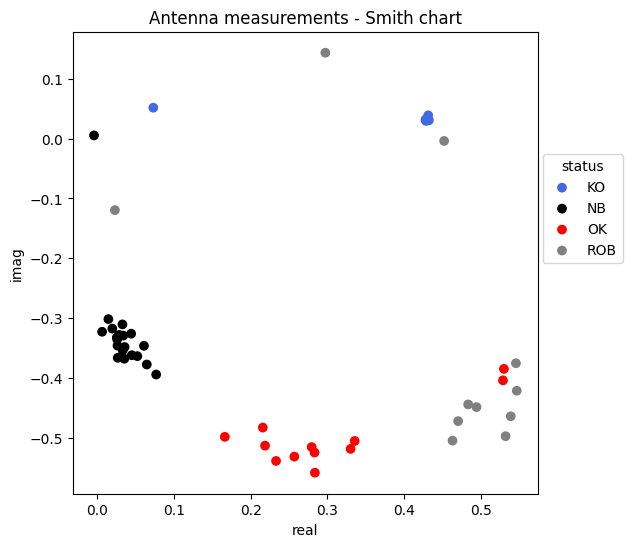

In [14]:
drawData(df_Smith, "Antenna measurements - Smith chart")

Validation tests on the new data:

In [15]:
# To show the neural net inference areas:
def drawRunResult(data, grid=[], title="", heatmap=[], runResult=[]):
  history, title = [], "%s for '%s' with KOs" % (title, filename)
  print(title)
  if runResult != []:
    seed, total_loss, total_accuracy, model, history = runResult
    print("Seed: %d\nTotal loss: %.6f\nTotal accuracy: %.2f %%" % (seed, total_loss, 100.*total_accuracy))
  # Drawing the heatmap:
  drawData(data, title, grid, heatmap)

In [16]:
# Splitting clean and noisy samples:
df_valid = df[df["status"] != "ROB"]
df_ROB = df[df["status"] == "ROB"]

In [17]:
print(df_valid["status"].value_counts())

NB    20
OK    12
KO     8
Name: status, dtype: int64


In [18]:
print(df_ROB["status"].value_counts())

ROB    11
Name: status, dtype: int64


In [19]:
classMapping = { "OK": 0, "KO": 1, "NB": 1, "ROB": 0 } # binary classification
data = df_valid.replace({"status": classMapping}, inplace=False) # not modifying the original data.
X, y_ref = data[["real", "imag"]].to_numpy(), data[["status"]].to_numpy().reshape(len(data))
y_pred = model.predict(X, verbose=0).reshape(len(X))

In [20]:
# Statistics:
start = time.perf_counter()
model.evaluate(X, y_ref)
end = time.perf_counter()
print("Elapsed time: %.3f s" % (end - start))

2/2 [==============================] - 0s 10ms/step - loss: 0.0463 - accuracy: 1.0000
Elapsed time: 0.250 s


Model heatmap with the new data:

median_model.h5 for 'New_data.csv' with KOs


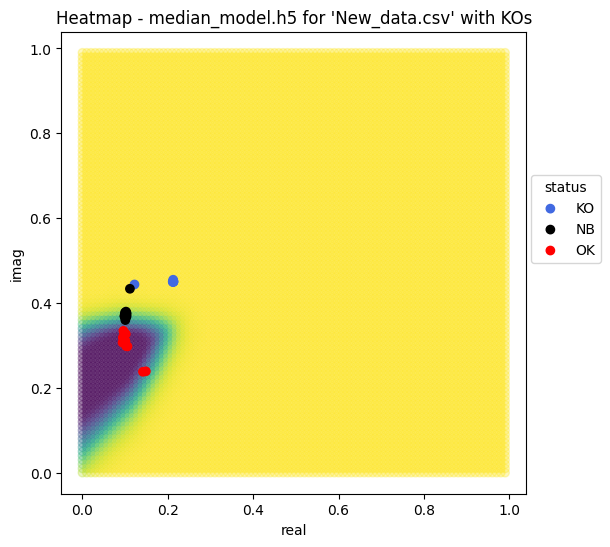

In [21]:
steps=100
grid = np.array([ (i/steps, j/steps) for i in range(steps) for j in range(steps) ])
heatmap=model.predict(grid, verbose=0)
drawRunResult(df_valid, grid=grid, title=modelName, heatmap=heatmap)

Quantized model heatmap:

In [22]:
steps = 100
offset = 0.5 # to keep only the relevant area
grid_shifted = np.array([ (i/steps-offset, j/steps-offset) for i in range(steps) for j in range(steps) ]) # shifted
heatmap_shifted = model.predict(grid_shifted, verbose=0)
quantized_heatmap = np.clip((255.*heatmap_shifted).round(), 0., 255.).astype("uint8") # approximated grid on 8-bit
quantized_heatmap.shape

(10000, 1)

In [23]:
arrayFilename = "quantized_heatmap.npy"
np.save(arrayFilename, quantized_heatmap)
# files.download(arrayFilename)
quantized_heatmap = np.load(arrayFilename)

In [24]:
def approximateInference(quantized_heatmap, steps, offset, x):
  row = round((x[0] + offset) * steps)
  col = round((x[1] + offset) * steps)
  if 0 <= row < steps and 0 <= col < steps:
    idx = row * steps + col
    return float(quantized_heatmap[idx] / 255.)
  return 1.

In [25]:
y_quant = np.array([ approximateInference(quantized_heatmap, steps, offset, x) for x in X ])
print("MSE to ground truth:", (np.square(y_quant - y_ref)).mean())
print("MSE to neural net predictions:", (np.square(y_quant - y_pred)).mean())

MSE to ground truth: 0.04838946559015764
MSE to neural net predictions: 0.0007047598108178968


In [26]:
# Accuracy for the quantized heatmap method:
print("Accuracy:", (y_ref == y_quant.round().astype("int")).sum() / len(X))

Accuracy: 1.0


Robustness tests:

In [27]:
print(df_ROB["status"].value_counts())

ROB    11
Name: status, dtype: int64


median_model.h5 for 'New_data.csv' with KOs


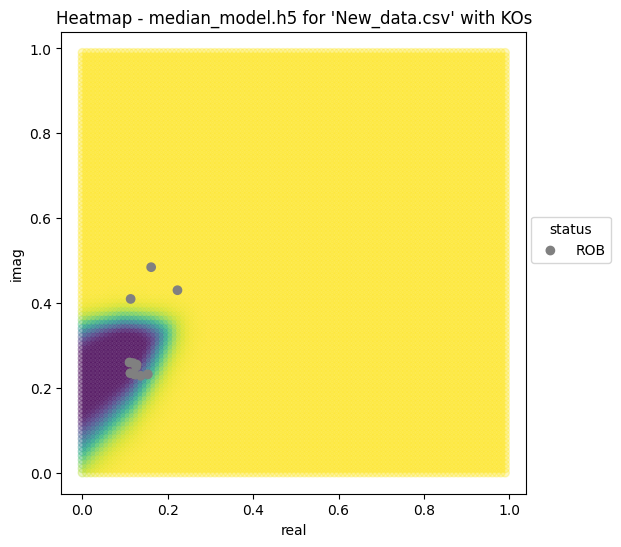

In [28]:
drawRunResult(df_ROB, grid=grid, title=modelName, heatmap=heatmap)

In [29]:
# Removing the samples in presence of metal plates:
df_ROB_clean = df_ROB[df_ROB["imag"] < 0.4]
df_ROB_clean

,real,imag,status
40,0.122190,0.231276,ROB
43,0.153170,0.232018,ROB
44,0.112221,0.234512,ROB
45,0.136443,0.228370,ROB
46,0.126047,0.250305,ROB
47,0.126935,0.254889,ROB
49,0.110229,0.259982,ROB
50,0.118735,0.258439,ROB


In [30]:
data = df_ROB_clean.replace({"status": classMapping}, inplace=False) # not modifying the original data.
X, y_ref = data[["real", "imag"]].to_numpy(), data[["status"]].to_numpy().reshape(len(data))

In [31]:
model.evaluate(X, y_ref)

1/1 [==============================] - 0s 26ms/step - loss: 0.0730 - accuracy: 0.8750


[0.07298091053962708, 0.875]

In [32]:
# Robustness of the quantized heatmap's inference:
y_quant = np.array([ approximateInference(quantized_heatmap, steps, offset, x) for x in X ])
print("Accuracy:", (y_ref == y_quant.round().astype("int")).sum() / len(X))

Accuracy: 0.875


Unrecognized sample:

In [33]:
fail = df_ROB_clean.iloc[1]
fail

real       0.15317
imag      0.232018
status         ROB
Name: 43, dtype: object

In [34]:
fail = fail * (dataMax - dataMin) + dataMin
fail["real"], fail["imag"]

(80.786, -107.9)

Inference time benchmarks:

In [35]:
classMapping = { "OK": 0, "KO": 1, "NB": 1, "ROB": 0 } # binary classification
data = df_valid.replace({"status": classMapping}, inplace=False) # not modifying the original data.
X, y = data[["real", "imag"]].to_numpy(), data[["status"]]

In [36]:
# 1 by 1 inference benchmark:
start = time.perf_counter()
for x in X:
  model.predict(x.reshape((1, 2)), verbose=0).round().astype("int")
end = time.perf_counter()
print("Elapsed time: %.3f s" % (end - start))
print("Average time per sample: %.0f ms" % (1000.*(end - start)/len(X)))

Elapsed time: 2.303 s
Average time per sample: 58 ms


In [37]:
# 1 by 1 inference benchmark for the grid approach:
start = time.perf_counter()
for x in X:
  round(approximateInference(quantized_heatmap, steps, offset, x))
end = time.perf_counter()
print("Elapsed time: %f s" % (end - start))
print("Average time per sample: %.3f ms" % (1000.*(end - start)/len(X)))

Elapsed time: 0.000829 s
Average time per sample: 0.021 ms
